In [1]:
import ast
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statistics

# Get the data

In [2]:
test = pd.read_csv('data/' + 'test.csv')
train = pd.read_csv('data/' + 'train.csv')
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

# Explore the data to gain insights

In [5]:
train_copy = train.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ec5c72a50>,
      dtype=object)

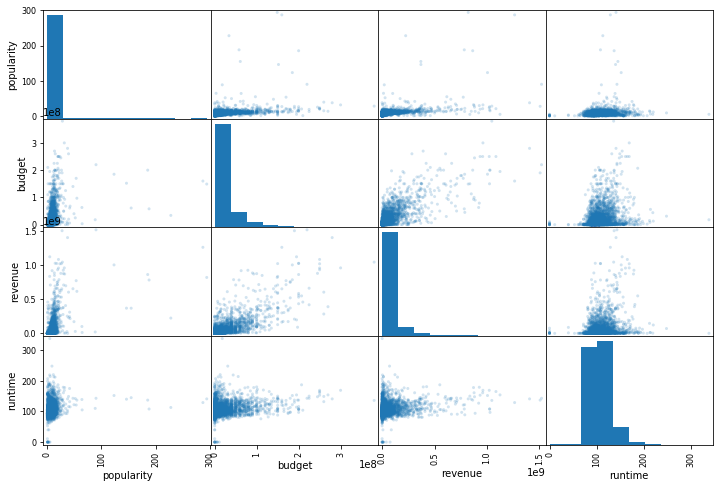

In [6]:
attributes = ["popularity", "budget", "revenue",
             "runtime"]
scatter_matrix(train_copy[attributes], figsize=(12,8), alpha=0.2)

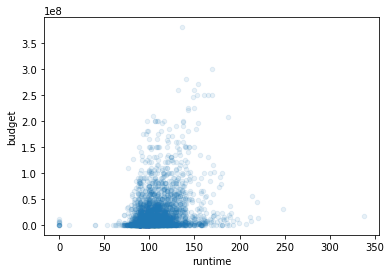

In [7]:
train_copy.plot(kind="scatter", x="runtime", y="budget", alpha=0.1)

# Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.

In [8]:
def collectionBooleanifier(collection):

    newCollection = []

    newVal = 0
    for x in collection:
        if x != x:
            newVal = 0
        else:
            newVal = 1
        newCollection.append(newVal) 
        
    return newCollection

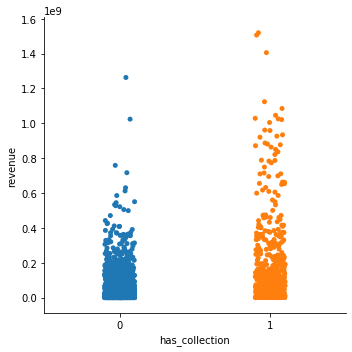

In [9]:
train_copy['has_collection'] = collectionBooleanifier(train_copy['belongs_to_collection'])
train_copy['has_homepage'] = collectionBooleanifier(train_copy['homepage'])

sns.catplot(x="has_collection", y="revenue", data=train_copy)

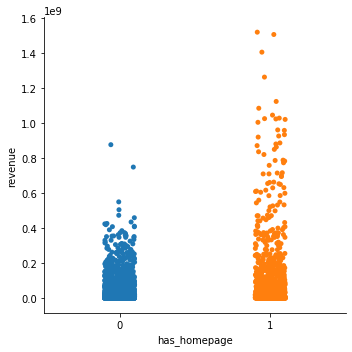

In [10]:
sns.catplot(x="has_homepage", y="revenue", data=train_copy)

In [11]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [12]:
train_copy.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,has_collection,has_homepage
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,1
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,1
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0


In [13]:

for i, e in enumerate(train['genres'][:5]):
    print(i, e)


0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [14]:
#Get all names for the genres

def namesOfGenres(collection):
    temp = []
    for l in collection:
        if l == l:
            a = ast.literal_eval(l)
            for x in a:
                text = {'id': x['id'], 'name': x['name']}
                if text not in temp:
                    temp.append(text)
    return temp
    
names = namesOfGenres(train_copy['genres'])
names

[{'id': 35, 'name': 'Comedy'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 28, 'name': 'Action'},
 {'id': 16, 'name': 'Animation'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 27, 'name': 'Horror'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 10402, 'name': 'Music'},
 {'id': 80, 'name': 'Crime'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 10769, 'name': 'Foreign'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 10752, 'name': 'War'},
 {'id': 37, 'name': 'Western'},
 {'id': 36, 'name': 'History'},
 {'id': 10770, 'name': 'TV Movie'}]

In [15]:
#onehot per row

amount_of_genres = [0] * len(names)

def genresToInt(_collection, names_collection):
    genres_temp = []
    for l in _collection:
        res =  [0] * len(names_collection)
        
        if l == l:
            a = ast.literal_eval(l)
            for i in range(0, len(names_collection)):
                for g in a:
                    if g == names_collection[i]:
                        res[i] = 1
                        amount_of_genres[i] += 1
            
        genres_temp.append(res)
    
    
    
    return genres_temp
                        
genres = genresToInt(train_copy['genres'], names)
genres

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [16]:
amount_of_genres
amounts = names.copy()
for i in range(0,len(amounts)):
    amounts[i]['amount'] = amount_of_genres[i]
amounts.sort(key=lambda x: x['amount'], reverse=True)
amounts

[{'id': 18, 'name': 'Drama', 'amount': 1531},
 {'id': 35, 'name': 'Comedy', 'amount': 1028},
 {'id': 53, 'name': 'Thriller', 'amount': 789},
 {'id': 28, 'name': 'Action', 'amount': 741},
 {'id': 10749, 'name': 'Romance', 'amount': 571},
 {'id': 80, 'name': 'Crime', 'amount': 469},
 {'id': 12, 'name': 'Adventure', 'amount': 439},
 {'id': 27, 'name': 'Horror', 'amount': 301},
 {'id': 878, 'name': 'Science Fiction', 'amount': 290},
 {'id': 10751, 'name': 'Family', 'amount': 260},
 {'id': 14, 'name': 'Fantasy', 'amount': 232},
 {'id': 9648, 'name': 'Mystery', 'amount': 225},
 {'id': 16, 'name': 'Animation', 'amount': 141},
 {'id': 36, 'name': 'History', 'amount': 132},
 {'id': 10402, 'name': 'Music', 'amount': 100},
 {'id': 10752, 'name': 'War', 'amount': 100},
 {'id': 99, 'name': 'Documentary', 'amount': 87},
 {'id': 37, 'name': 'Western', 'amount': 43},
 {'id': 10769, 'name': 'Foreign', 'amount': 31},
 {'id': 10770, 'name': 'TV Movie', 'amount': 1}]

In [17]:
#Create colloms

def createCollomnDown2D(name, arr, index, data):
    newArr = []
    for row in arr:
        newArr.append(row[index])
    
    data[name] = newArr

def createCollomnDownInCollection(collection, names_collection, genres_collection):
    for i in range(0, len(names)):
        createCollomnDown2D("has_genre_" + names_collection[i]['name'].replace(" ", "_").lower(), 
                            genres_collection, 
                            i, 
                            collection)

createCollomnDownInCollection(train_copy, names, genres)
# It works!!
train_copy['has_genre_comedy'].head()

0    1
1    1
2    0
3    0
4    0
Name: has_genre_comedy, dtype: int64

In [18]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 45 columns):
id                           3000 non-null int64
belongs_to_collection        604 non-null object
budget                       3000 non-null int64
genres                       2993 non-null object
homepage                     946 non-null object
imdb_id                      3000 non-null object
original_language            3000 non-null object
original_title               3000 non-null object
overview                     2992 non-null object
popularity                   3000 non-null float64
poster_path                  2999 non-null object
production_companies         2844 non-null object
production_countries         2945 non-null object
release_date                 3000 non-null object
runtime                      2998 non-null float64
spoken_languages             2980 non-null object
status                       3000 non-null object
tagline                      2403 non-null ob

In [19]:
attributes = []
for n in names:
    attributes.append("has_genre_" + n['name'].replace(" ", "_").lower())
len(attributes)

20

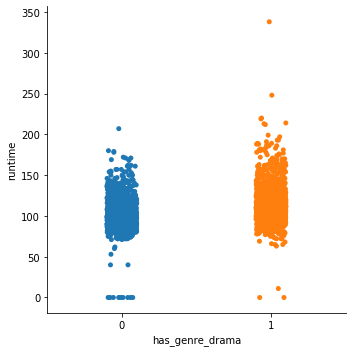

In [20]:
sns.catplot(x="has_genre_drama", y="runtime", data=train_copy)

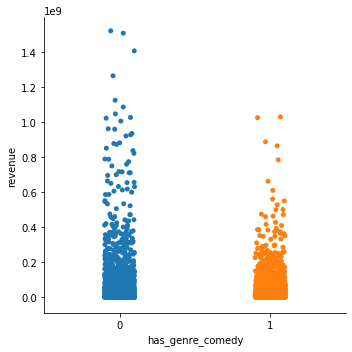

In [21]:
sns.catplot(x="has_genre_comedy", y="revenue", data=train_copy)

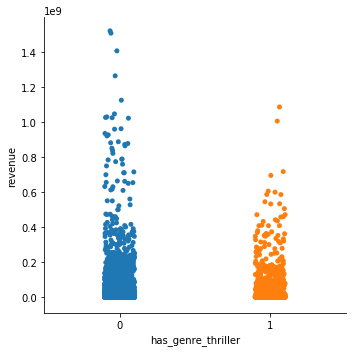

In [22]:
sns.catplot(x="has_genre_thriller", y="revenue", data=train_copy)

### Cast

In [23]:
def cast_counter(column):
    cast_size = [0] * len(column)
    male_cast_size = [0] * len(column)
    female_cast_size = [0] * len(column)
    uncategorized_cast_size = [0] * len(column)
    
    i = 0
    for cast_list_str in column:
        
        if cast_list_str == cast_list_str:
            cast_list = ast.literal_eval(cast_list_str)
            cast_size[i] = len(cast_list)
            
            for cast in cast_list:
                if(cast['gender'] == 1):
                    female_cast_size[i] += 1
                elif(cast['gender'] == 2):
                    male_cast_size[i] += 1
                else:
                    uncategorized_cast_size[i] += 1
            
        else:
            cast_size[i] = np.nan
            female_cast_size[i] = np.nan
            male_cast_size[i] = np.nan
            uncategorized_cast_size[i] = np.nan
        i+=1
    
    return cast_size, female_cast_size, male_cast_size, uncategorized_cast_size

In [24]:
def attribute_counter(column):
    attribute_size = [0] * len(column)
    
    i = 0
    for attribute_list_str in column:
        
        if attribute_list_str == attribute_list_str:
            attribute_list = ast.literal_eval(attribute_list_str)
            attribute_size[i] = len(attribute_list)           
        else:
            attribute_size[i] = np.nan
        i+=1
    
    return attribute_size

In [25]:
train_copy['cast_size'], train_copy['female_cast_size'], train_copy['male_cast_size'], train_copy['uncategorized_cast_size'] = cast_counter(train_copy['cast'])
train_copy = train_copy.drop('cast', axis = 1)

In [26]:
def attribute_length(column, length) :
    new_column = [0] * length
    
    i = 0
    for data_attribute in column:
        if data_attribute == data_attribute:
            new_column[i] = len(data_attribute)
        else:
            new_column[i] = np.nan
        i += 1       
        
    return new_column       

In [27]:
train_copy['title_length'] = attribute_length(train_copy['title'], 3000)
train_copy['tagline_length'] = attribute_length(train_copy['tagline'], 3000)
train_copy['crew_size'] = attribute_counter(train_copy['crew'])
train_copy['num_keywords'] = attribute_counter(train_copy['Keywords'])


In [28]:

def release_date_conv(collection, length):
    month = []
    year = []

    for t in collection['release_date']:
        if t == t:
            split_arr = t.split('/')
            month.append(int(split_arr[0]))

            yearInt = int(split_arr[2])
            if(yearInt < 20):
                year.append(2000 + yearInt)
            else:
                year.append(1900 + yearInt)
        else:
            #FIX ME
            month.append(10)
            year.append(2000)
        
    while len(month) < length:
        month.append(0)
        year.append(0)
    
    collection['release_month'] = month
    collection['release_year'] = year
    
    collection = collection.drop(['release_date'], axis=1)
        
release_date_conv(train_copy, 3000)

In [29]:
len(train_copy['release_month'])

3000

In [30]:
len(train_copy['release_year'])

3000

Here we be fixing budget so that it does not contain zeros as those are added just to be added.

In [31]:
# budget_median = sum(train_copy['budget']) / len(train_copy['budget'])
budget_median = statistics.median(train_copy['budget'])
budget_median

8000000.0

In [32]:
for x in range(0, len(train_copy['budget'])):
    if train_copy['budget'][x] == 0:
        train_copy['budget'][x] = budget_median
        


/home/jhoffis/anaconda3/envs/dat158/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
def runtime_onehot(collection, length):
    newRuntimes = []
    for x in train_copy['runtime']:
        if x == x:
            newRuntimes.append(int(x))
        else:
            newRuntimes.append(0)
    
    while len(newRuntimes) < length:
        newRuntimes.append(0)

    collection['runtime'] = newRuntimes


In [34]:
runtime_onehot(train_copy, 3000)
len(train_copy['runtime'])

3000

In [35]:
def status_one_hot(collection):
    statusOnehot = []
    for movie in collection['status']:
        if movie is "Released":
            statusOnehot.append(1)
        else:
            statusOnehot.append(0)
    return statusOnehot

In [36]:
train_copy['status'] = status_one_hot(train_copy)

In [37]:
def language_encoder(column, length):

    newLang = [0] * length
    
    i = 0
    for x in column:
        if x == x:
            ds = ast.literal_eval(x)
            if any(d['iso_639_1'] == 'en' for d in ds):
                newLang[i] = 1
        else:
            newLang[i] = 0 #setter den til engelsk hvis språk ikke er satt. (fordi det er flest engelske)
        i+=1
    
    return newLang

In [38]:
train_copy['has_english'] = language_encoder(train_copy['spoken_languages'], 3000)
#lang_printer(train_copy['spoken_languages'])

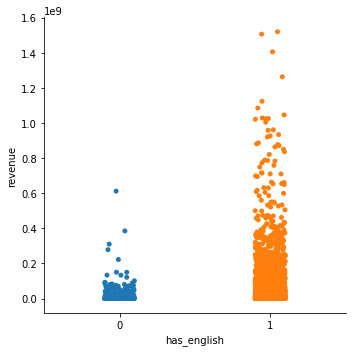

In [39]:
sns.catplot(x="has_english", y="revenue", data=train_copy)

We can see here that english has a large impact on revenue. However, it has to be said that there are more english speaking films than non-english speaking films in this collection.

In [40]:
# Remove rest, might use later
from numbers import Number
def drop_object_collomns(collection):
    
    collection = collection.drop(['homepage'], axis=1)
    
    collection = collection.copy()
    for c in collection:
        if not isinstance(collection[c][0], Number):
            collection = collection.drop(c, axis=1)
            
    return collection

train_copy = drop_object_collomns(train_copy)

In [41]:
train_copy = train_copy.fillna(train_copy.median())

In [42]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 39 columns):
id                           3000 non-null int64
budget                       3000 non-null int64
popularity                   3000 non-null float64
runtime                      3000 non-null int64
status                       3000 non-null int64
revenue                      3000 non-null int64
has_collection               3000 non-null int64
has_homepage                 3000 non-null int64
has_genre_comedy             3000 non-null int64
has_genre_drama              3000 non-null int64
has_genre_family             3000 non-null int64
has_genre_romance            3000 non-null int64
has_genre_thriller           3000 non-null int64
has_genre_action             3000 non-null int64
has_genre_animation          3000 non-null int64
has_genre_adventure          3000 non-null int64
has_genre_horror             3000 non-null int64
has_genre_documentary        3000 non-null int64
has_genre

# Train

In [43]:
train = train_copy.copy()
X = train.drop(['revenue'], axis=1)
y = train['revenue'].copy()
X_test = test.drop(['id'], axis=1)

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X)
lin_mse = np.log(mean_squared_error(y, predictions))
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6.031524659655478

In [46]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [3, 4, 6, 8, 10, 12]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(lin_reg, param_grid, cv=5,
scoring='neg_mean_squared_log_error')
grid_search.fit(X, y)

ValueError: Invalid parameter max_features for estimator LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
grid_search.best_params_

In [ ]:
# def display_scores(scores):
#     print("Scores:", scores)
#     print("Mean:", scores.mean())
#     print("Standard deviation:", scores.std())
# display_scores(rmse_scores)

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

## Prepare the test data

In [ ]:
test_copy = test.copy()

test_copy['has_collection'] = collectionBooleanifier(test_copy['belongs_to_collection'])
test_copy['has_homepage'] = collectionBooleanifier(test_copy['homepage'])

In [ ]:
genres = genresToInt(test_copy['genres'], names)
createCollomnDownInCollection(test_copy, names, genres)
test_copy.info()

In [ ]:
release_date_conv(test_copy, 4398)
len(test_copy['release_month'])

In [ ]:
runtime_onehot(test_copy, 4398)
len(test_copy['release_month'])

In [ ]:
test_copy['status'] = status_one_hot(test_copy)
len(test_copy['release_month'])

In [ ]:
test_copy['has_english'] = language_encoder(test_copy['spoken_languages'], 4398)
len(test_copy['release_month'])

In [ ]:
test_copy['cast_size'], test_copy['female_cast_size'], test_copy['male_cast_size'], test_copy['uncategorized_cast_size'] = cast_counter(test_copy['cast'])
test_copy = test_copy.drop('cast', axis = 1)

test_copy['title_length'] = attribute_length(test_copy['title'], 4398)
test_copy['tagline_length'] = attribute_length(test_copy['tagline'], 4398)
test_copy['crew_size'] = attribute_counter(test_copy['crew'])
test_copy['num_keywords'] = attribute_counter(test_copy['Keywords'])

In [ ]:
test_copy = drop_object_collomns(test_copy)
test_copy = test_copy.drop(['production_companies'], axis=1)
len(test_copy['release_month'])

In [ ]:
for x in range(0, len(test_copy['budget'])):
    if test_copy['budget'][x] == 0:
        test_copy['budget'][x] = budget_median

In [ ]:
test_copy = test_copy.fillna(train_copy.median())
test_copy.info()

In [ ]:
len(test_copy['release_month'])

## Let's finish this

In [ ]:
test_copy['release_month'].fillna(3)
test_copy['release_year'].fillna(2000)
popavg = sum(test_copy['popularity']) / len(test_copy['popularity'])
test_copy['popularity'].fillna(popavg)

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
# test_prepared = impute(test_copy)
final_pred = final_model.predict(test_copy)
subm = pd.DataFrame({'id': test.id, 'revenue': final_pred})
subm

In [ ]:
pd.DataFrame(subm).to_csv('submission_impossible_III_2006.csv', index = False)

Første gangen jeg submittet til kaggle fikk jeg større score enn når jeg testet selv lokalt. Ca. 2.8 vs ca. 3.0. Dette betyr sikkert at jeg har overfittet litt. 